# Classification and Similarity Metrics.
# Cross Validation.
# Titanic Dataset.
-----------------------------
Radoslav Petkov

### About me
--------------
* Contact: https://www.linkedin.com/in/radoslav-petkov-8a4a53144/

# Agenda
* Recap
    * Supervised vs Unsupervised
    * Classification vs Regression
* Similarity Metrics
    * Euclidian distance
    * Manhattan distance
    * Cosine similarity
* Classification Metrics
    * Accuracy
    * Confusion Matrix
        * Precision
        * Recall
        * F1
* Cross Validation
* Titanic

# Recap

### Supervised vs Unsupervised
### Classification vs Regression

# Similarity Metrics

Def: Real valued function that measures the similarity between 2 objects (vectors).

## Euclidian distance

Def : Ordinary straight line distance: $ \sqrt{\sum_{i=1}^n (x_i-y_i)^2} $

![](euclidean.png)



## Manhattan distance

Def: Simple sum of the horizontal and vertical components $ \sum_{i=1}^n |x_i-y_i| $

![](manhattan.png)

## Cosine similarity
Def: Measure of similarity between 2 non-zero vectors of a normed space that measures the cosine of the angle between them. $ cos(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||} $

![](cosine.png)

# Summarized
![](cover_post_final.png)

# Cross Validation

### We overfit. We do not have enought data. What we do?

# K-Fold Cross Validation


Split the dataset in K subsets and use K-1 for training and 1 for testing. The error rate is avaraged over all K trials.
![](K-fold_cross_validation_EN.jpg)

# Classification metrics

How to measure the performance of a model?

## Accuracy
The number of correct predictions from all predictions made.
![](accuracy.jpg)

Problem statement: 

Imagine having labels (False and True) distributed like this: 
***90% False and 10% True***

The model that constantly output ***False*** will have ***90%*** accuracy. Not bad. 

# The solution: Confusion matrix

Table that allows visualization of the performance of a supervised algorithm

![](sphx_glr_plot_confusion_matrix_002.png)

# Binary Confusion Matrix
![](confusion_matrix_1.png)

## Precision
Precision is: $\frac{TP}{TP + FP}$

True Positives divided by the sum of True Positives and False Positives

![](confusion_matrix_1.png)

## Recall

Recall is: $\frac{TP}{TP + FN}$

True Positives divided by the sum of True Positives and False Negatives.
![](confusion_matrix_1.png)

# F1 score

F1 score is the harmonic mean of Recall and Precision: $\frac{2*Recall*Precision}{Recall + Precission} $

# Titanic: Machine Learning from Disaster

![](hqdefault.jpg)

| Variable |	Definition |	Key|
--- | --- | ---
|survival|	Survival|	0 = No, 1 = Yes
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd
|sex	|Sex	
|Age	|Age in years	
|sibsp|	# of siblings / spouses aboard the Titanic	
|parch|	# of parents / children aboard the Titanic	
|ticket	|Ticket number	
|fare|	Passenger fare	
|cabin|	Cabin number	
|embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/radpet/fmi-ml/master/titanic/train.csv', index_col='PassengerId')

train,test = train_test_split(data, stratify=data['Survived'], random_state=123)
print('Train', train.shape)
print('Test', test.shape)
train.head()

Train (668, 11)
Test (223, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


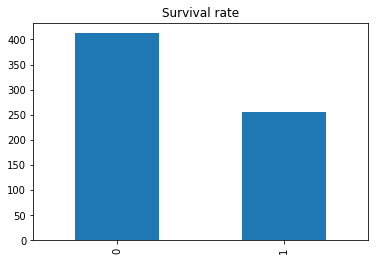

In [2]:
import matplotlib.pyplot as plt
train['Survived'].value_counts().plot(kind='bar', title='Survival rate')
plt.show()

# Now lets explore how some of the variables affect the survival

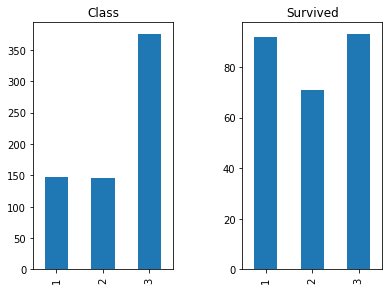

In [3]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3, 1)
train['Pclass'].value_counts(sort=False).plot(kind="bar", title="Class")
fig.add_subplot(2, 3, 2)
train[ train['Survived'] == 1]['Pclass'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survived')
plt.show()

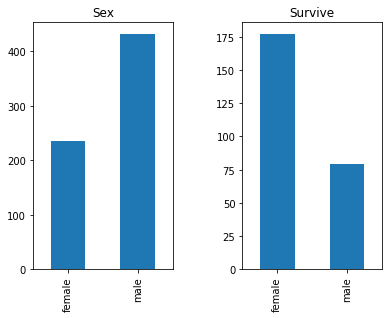

In [4]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3,1)
train['Sex'].value_counts(sort=False).sort_index().plot(kind="bar", title="Sex")
fig.add_subplot(2, 3,2)
train[ train['Survived'] == 1]['Sex'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survive')
plt.show()

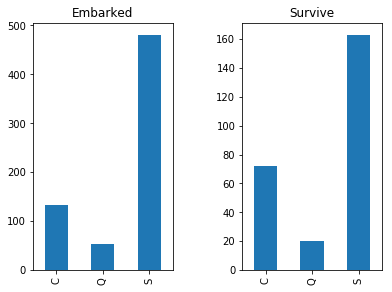

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3, 1)
train['Embarked'].value_counts(sort=False).sort_index().plot(kind="bar", title="Embarked")
fig.add_subplot(2, 3, 2)
train[ train['Survived'] == 1]['Embarked'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survive')
plt.show()

In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         131
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       532
Embarked      1
dtype: int64

### We have missing data! What can we do now?

* Remove whole sample
* Fill with mean
* Fill with data augmentation
* Create model that predicts the missing values

# Lets explore the data more and find if we can find a way to fill Age,Cabin,Embarked

Lets look what the names might tell us. A quick search in wikipedia (https://en.wikipedia.org/wiki/English_honorifics) gives:

* Master: for boys or young men and as a title for the heir apparent of a Scottish baron or viscount.
* Mr: for men, regardless of marital status, who do not have another professional or academic title
* Miss: for girls, unmarried women and (in the UK) married women who continue to use their maiden name (although "Ms" is often preferred for the last two). 
* Ms: for women, regardless of marital status or when marital status is unknown.

In [7]:
train[ train['Age']<12].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [8]:
train[ train['Age']>12].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


In [9]:
import numpy as np
title_list = ['Mr.', 'Master.', 'Mrs.', 'Miss']
def fill_age(dataset):
    dt = dataset.copy()
    def map_names(name):
        for title in title_list:
            if title in name:
                return title
        return 'Unknown'

    dt['Name'] = dt['Name'].map(map_names)

    def slice_and_get_mean_age_by_name(name):
        return dt.loc[dt['Name'] == name, 'Age'].mean()

    age_means = {title:slice_and_get_mean_age_by_name(title) for title in title_list}
    print(age_means)
    def fill_age(person):
        if person['Name'] == 'Unknown':
            person['Age'] = dt['Age'].mean()
        else:
            if pd.isnull(person['Age']):
                person['Age'] = age_means[person['Name']]
        return person
       
    
    dt = dt.apply(fill_age, axis=1)
    
    print(dt['Age'].isnull().sum())
    return dt
train_filled = fill_age(train)


{'Mrs.': 35.53012048192771, 'Master.': 4.2279999999999998, 'Mr.': 31.506644518272424, 'Miss': 22.323809523809523}
0


In [47]:
null_age_idx = train[train['Age'].isnull()][:10].index
train[train['Age'].isnull()][:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C


In [48]:
train_filled.loc[null_age_idx]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
155,0,3,Mr.,male,31.506645,0,0,Fa 265302,7.3125,NaN,S
465,0,3,Mr.,male,31.506645,0,0,A/S 2816,8.0500,NaN,S
670,1,1,Mrs.,female,35.530120,1,0,19996,52.0000,C126,S
539,0,3,Mr.,male,31.506645,0,0,364498,14.5000,NaN,S
733,0,2,Mr.,male,31.506645,0,0,239855,0.0000,NaN,S
634,0,1,Mr.,male,31.506645,0,0,112052,0.0000,NaN,S
412,0,3,Mr.,male,31.506645,0,0,394140,6.8583,NaN,Q
649,0,3,Mr.,male,31.506645,0,0,S.O./P.P. 751,7.5500,NaN,S
296,0,1,Mr.,male,31.506645,0,0,PC 17612,27.7208,NaN,C


In [61]:
train['Fare'].value_counts().iloc[:15]

13.0000    35
7.8958     32
8.0500     28
26.0000    25
7.7500     25
10.5000    19
7.9250     14
7.2292     14
7.7750     12
0.0000     12
26.5500    11
7.2500     11
7.2250     10
8.6625     10
7.8542      9
Name: Fare, dtype: int64

In [12]:
def get_labels(dataset):
    return dataset['Survived']

In [13]:
def get_features(dataset):
    features = pd.DataFrame()
    features['male'] = (dataset['Sex'] == 'male').astype('float')
    features['female'] = (dataset['Sex'] == 'female').astype('float')
    for pclass in range(1,4):
        features['pclass_' + str(pclass)] = (dataset['Pclass'] == pclass).astype('float')
        
    for embarked in ['S','C','Q']:
        features['embarked_' + embarked] = (dataset['Embarked'] == embarked).astype('float')
    
    features['age'] = dataset['Age']
    features['sibsp'] = dataset['SibSp']
    features['Parch'] = dataset['Parch']
    features['Fare'] = dataset['Fare'] 
    
    return features

In [14]:
x_train = get_features(train_filled)
y_train = get_labels(train)
x_train.head()

,male,female,pclass_1,pclass_2,pclass_3,embarked_S,embarked_C,embarked_Q,age,sibsp,Parch,Fare
PassengerId,,,,,,,,,,,,
684,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,14.0,5,2,46.9000
422,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,21.0,0,0,7.7333
337,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29.0,1,0,66.6000
682,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,27.0,0,0,76.7292
611,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,39.0,1,5,31.2750


In [15]:
y_train.head()

PassengerId
684    0
422    0
337    0
682    1
611    0
Name: Survived, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

C = [0.01, 1, 100]
class_weight=[None, 'balanced']
best_model = None
best_scores = np.zeros((5,))
best_params = {}

for c in C:
    for weight in class_weight:
        model_logistic = LogisticRegression(C=c,class_weight=weight, random_state=123)
        scores = cross_val_score(model_logistic,x_train, y_train, cv=5, scoring='accuracy')
        if(best_scores.mean() < scores.mean()):
            best_scores = scores
            best_model = model_logistic
            best_params['C'] = c
            best_params['class_weight'] = weight

print(best_scores)
print(best_scores.mean())
print(best_params)

[ 0.80740741  0.80597015  0.78947368  0.78947368  0.78947368]
0.796359721859
{'C': 1, 'class_weight': None}


In [17]:
from sklearn.svm import LinearSVC

C = [0.001, 0.01, 1, 10, 100]
class_weight=[None, 'balanced']
best_model = None
best_scores = np.zeros((5,))
best_params = {}

for c in C:
    for weight in class_weight:
        model_svm = LinearSVC(C=c,class_weight=weight, random_state=123)
        scores = cross_val_score(model_svm,x_train, y_train, cv=5, scoring='accuracy')
        if(best_scores.mean() < scores.mean()):
            best_scores = scores
            best_model = model_svm
            best_params['C'] = c
            best_params['class_weight'] = weight

print(best_scores)
print(best_scores.mean())
print(best_params)

[ 0.79259259  0.81343284  0.79699248  0.76691729  0.78947368]
0.791881777412
{'C': 0.01, 'class_weight': None}


In [18]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 50, 100]
class_weight=[None, 'balanced']
best_model = None
best_scores = np.zeros((5,))
best_params = {}

for num_est in n_estimators:
    for weight in class_weight:
        model_forest = RandomForestClassifier(n_estimators=num_est, class_weight=weight, random_state=123)
        scores = cross_val_score(model_forest,x_train, get_labels(train), cv=5, scoring='accuracy')
        if(best_scores.mean() < scores.mean()):
            best_scores = scores
            best_model = model_forest
            best_params['n_estimators'] = num_est
            best_params['class_weight'] = weight


print(best_scores)
print(best_scores.mean())
print(best_params)

[ 0.85185185  0.79104478  0.80451128  0.81954887  0.81203008]
0.815797370707
{'n_estimators': 100, 'class_weight': None}


More information about hyperparameter tuning can be found at the links below:
https://en.wikipedia.org/wiki/Hyperparameter_optimization , http://scikit-learn.org/stable/modules/grid_search.html 

# Lets test our models with best scores

In [19]:
x_test = get_features(fill_age(test)) # we may set age by title to constant once we obtain it from train set
y_test = get_labels(test)

{'Mrs.': 37.119999999999997, 'Master.': 6.3049999999999997, 'Mr.': 35.041237113402062, 'Miss': 20.365853658536587}
0


In [20]:
model_logistic = LogisticRegression(C=100,class_weight='balanced', random_state=123)
model_logistic.fit(x_train, y_train)

score = model_logistic.score(x_test,y_test)
print(score)

0.784753363229


In [21]:
model_svm = LinearSVC(C=0.01, random_state=123)
model_svm.fit(x_train, y_train)

score = model_svm.score(x_test,y_test)
print(score)

0.775784753363


In [22]:
model_forest = RandomForestClassifier(n_estimators=100, random_state=123)
model_forest.fit(x_train, y_train)

score = model_forest.score(x_test,y_test)
print(score)

0.811659192825


In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=25)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_pred=model_forest.predict(x_test), y_true=y_test, labels=model_forest.classes_)
class_names = model_forest.classes_
from sklearn.metrics import classification_report
report = classification_report(y_pred=model_forest.predict(x_test), y_true=y_test, labels=model_forest.classes_)

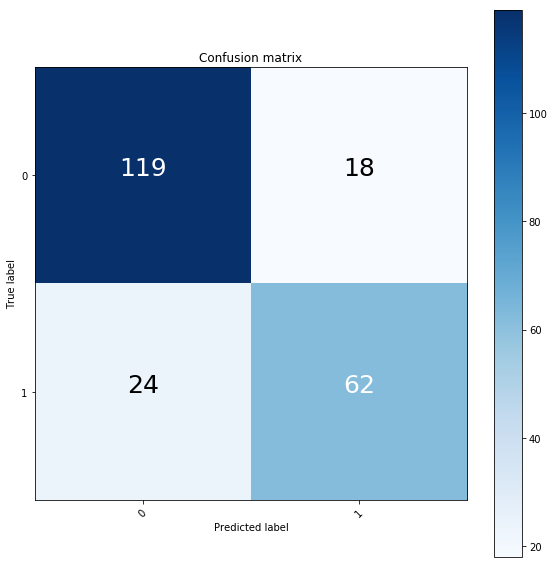

             precision    recall  f1-score   support

          0       0.83      0.87      0.85       137
          1       0.78      0.72      0.75        86

avg / total       0.81      0.81      0.81       223



In [64]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()
print(report)

![](the_end_thank.jpg)

![](qa.jpg)

# References
* http://fmi.machine-learning.bg/lectures/07-model-validation
* http://scikit-learn.org/stable/modules/model_evaluation.html
* https://turi.com/learn/userguide/evaluation/classification.html
* http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* https://www.kaggle.com/c/titanic
* https://medium.com/@klintcho/explaining-precision-and-recall-c770eb9c69e9